# An Exploration of the Mandelbrot-Set, Julia-Set and the chaotic Bifurcation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps

## Naive Implementation

In [2]:
def create_mandelbrot(c):
    f = lambda x: x**2 + c
    return f

def stability(number, it):
    return number / it

def run(f, it):
    x = 0
    
    number = 0
    for i in range(it):
        number = i
        x = f(x)
        if abs(x) > 2:
            break
    
    return stability(number, it)


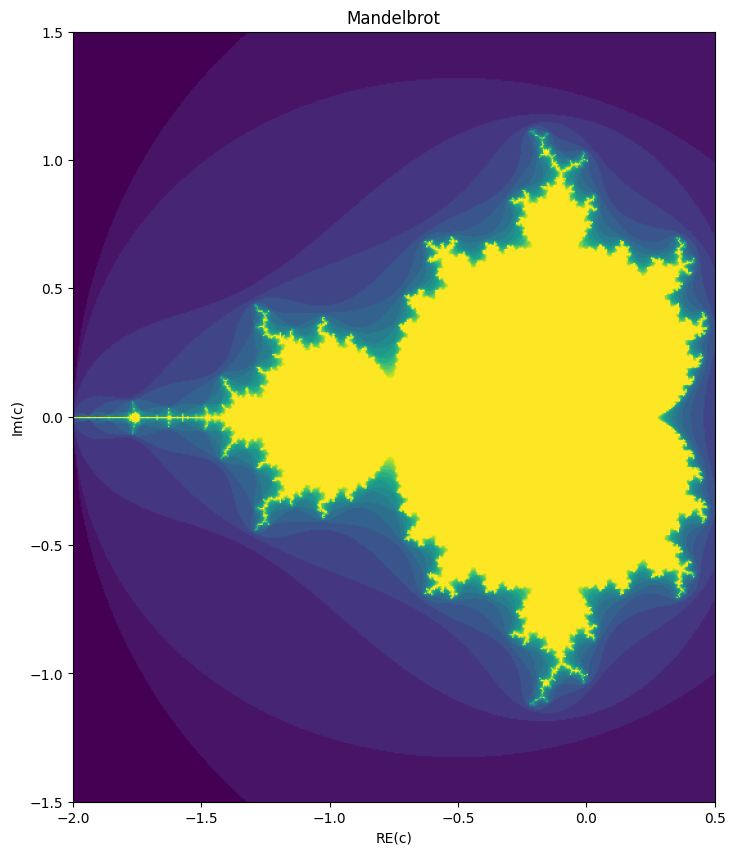

In [25]:
def plot_mandelbrot(r_upper=.5, r_lower=-2, i_upper=1.5, i_lower=-1.5, it=20):
    x = np.arange(r_lower, r_upper, 0.005)
    y = np.arange(i_lower, i_upper, 0.005)

    xv, yv = np.meshgrid(x, y)

    complex = xv + yv * 1j

    res = np.zeros(complex.shape)

    for idx, c in np.ndenumerate(complex):
        res[idx] = run(create_mandelbrot(c), it)

    plt.figure(figsize=(15,10))
    plt.imshow(res, extent=[r_lower, r_upper, i_lower, i_upper])
    plt.title("Mandelbrot")
    plt.xlabel("RE(c)")
    plt.ylabel("Im(c)")
    

plot_mandelbrot()



## Matrix-wise Implementation

In [3]:
R_UPPER = .5
R_LOWER = -2
I_UPPER = 1.3
I_LOWER = -1.3

In [4]:
def mandelbrot(x, c):
    return x**2 + c

def create_grid(stepsize, r_upper=R_UPPER, r_lower=R_LOWER, i_upper=I_UPPER, i_lower=I_LOWER):
    x = np.arange(r_lower, r_upper, stepsize)
    y = np.arange(i_lower, i_upper, stepsize)

    xv, yv = np.meshgrid(x, y)

    return xv + yv * 1j

In [5]:
# it: max number of iterations to run
# sample_step: the sample step size of the grid
def plot_mandelbrot(it, sample_step, cmap="viridis"):
    # to handle overflow of very large numbers
    err_setting = np.seterr(over='ignore', invalid='ignore')
    grid = create_grid(sample_step)

    x = 0
    res = []
    for i in range(it):
        x = mandelbrot(x, grid)

        res.append((np.abs(x) <= 2).astype(int))

    stabil = np.stack(res, axis=0).sum(axis=0)

    plt.figure(figsize=(15,10))
    plt.imshow(stabil, extent=[R_LOWER, R_UPPER, I_LOWER, I_UPPER], cmap=cmap)
    plt.title("Mandelbrot")
    plt.xlabel("RE(c)")
    plt.ylabel("Im(c)")
    

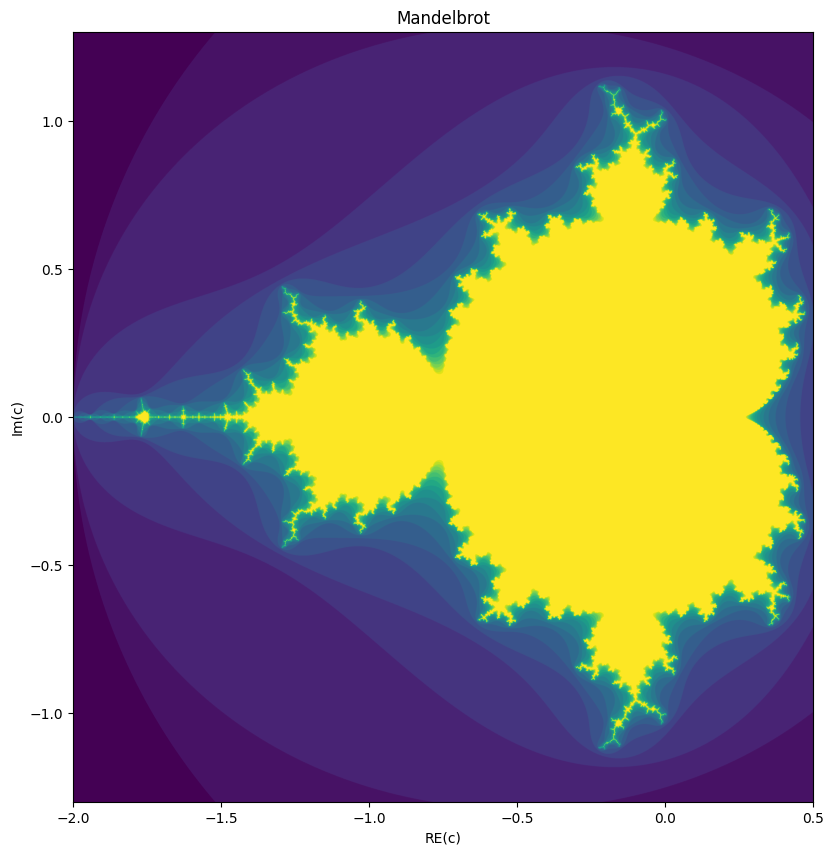

In [29]:
plot_mandelbrot(20, 0.0005)

You can alter the colormap! An Overview of availible maps can you find [here](https://matplotlib.org/stable/users/explain/colors/colormaps.html)

In [6]:
list(colormaps)[5]

'twilight'

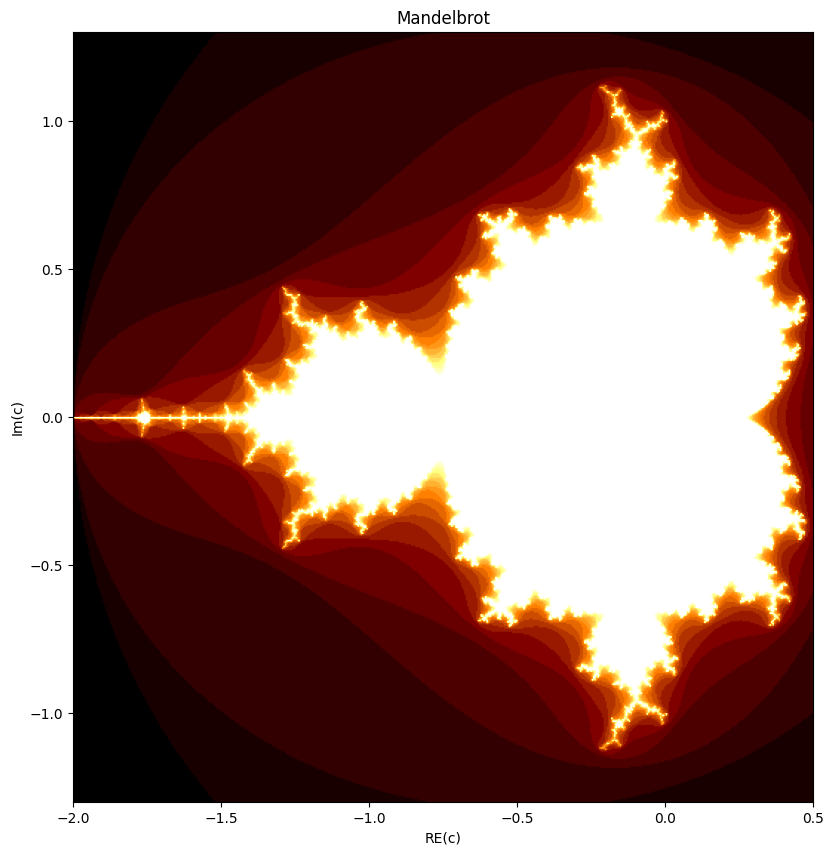

In [31]:
plot_mandelbrot(20, 0.005, "afmhot")

## Julia Set

In [7]:
R_UPPER = 1.5
R_LOWER = -1.5
I_UPPER = 1.5
I_LOWER = -1.5

In [8]:
# it: max number of iterations to run
# sample_step: the sample step size of the grid
def plot_juliaset(it, sample_step, c, cmap="viridis"):
    # to handle overflow of very large numbers
    err_setting = np.seterr(over='ignore', invalid='ignore')
    grid = create_grid(sample_step, r_upper=R_UPPER, r_lower=R_LOWER, i_upper=I_UPPER, i_lower=I_LOWER)
    
    res = []
    for i in range(it):
        grid = mandelbrot(grid, c)

        res.append((np.abs(grid) <= 2).astype(int))

    stabil = np.stack(res, axis=0).sum(axis=0)

    plt.figure(figsize=(15,10))
    plt.imshow(stabil, extent=[R_LOWER, R_UPPER, I_LOWER, I_UPPER], cmap=cmap)
    plt.title("Julia Set for c = " + str(c))
    plt.xlabel("RE(x) (start value)")
    plt.ylabel("Im(x) (start value)")


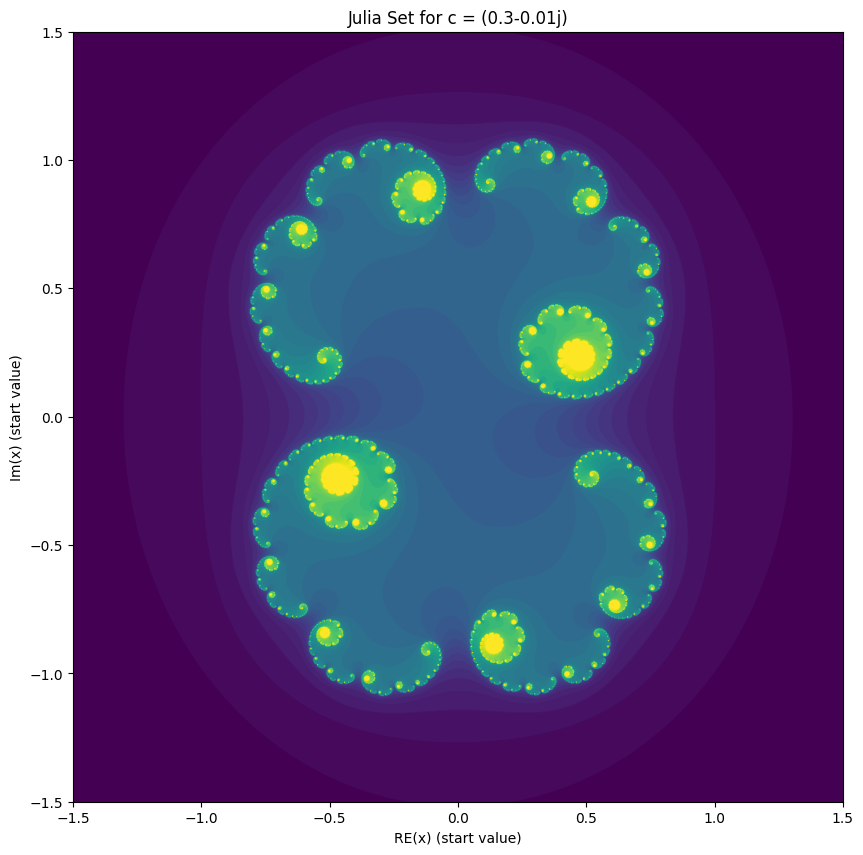

In [34]:
plot_juliaset(40, 0.001, .3-.01j)

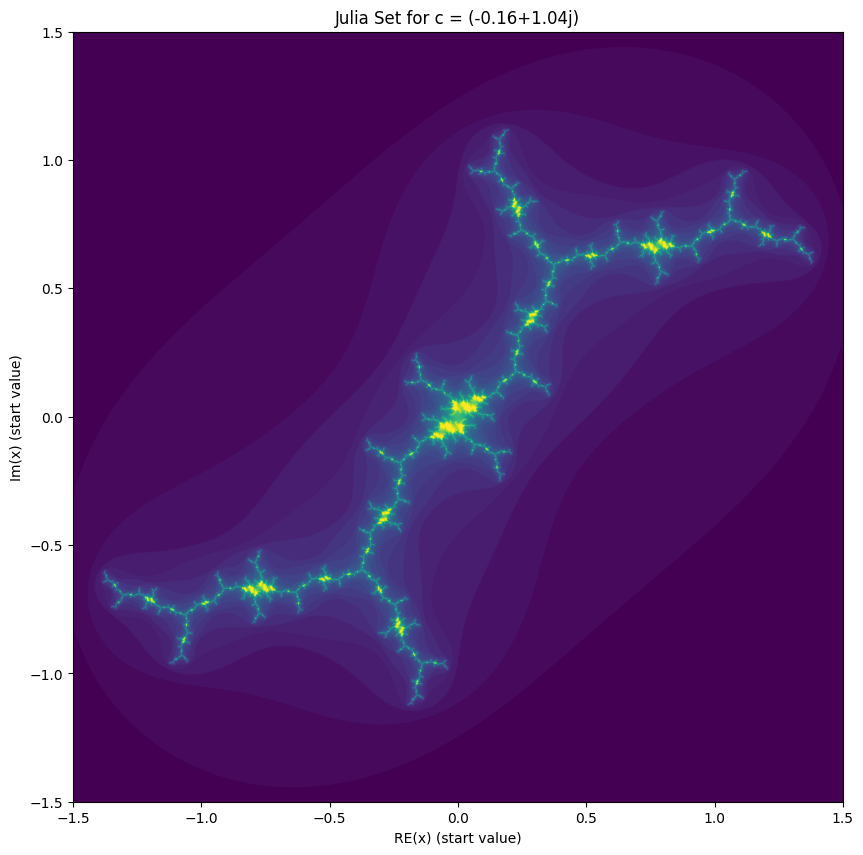

In [35]:
plot_juliaset(40, 0.001, -.16+1.04j)

## Bifurcation

In [159]:
# population growth
# p: population percentage
# 1-p: population percentage of prayer
# r: population growth
def logistic_map(p, r):
    return r*p*(1-p)

def gaussian(x, r):
    return np.exp(4. * -x**2) + r

# helper function to run f multiple times
def run_func(f, x, years, *args):
    #print(args)
    ys = [x]
    for _ in range(years):
        x = f(x, args)
        #print(x.shape)
        ys.append(x)
        #print(ys)

    return np.stack(ys, axis=0)

Text(0.5, 1.0, 'Gaussian')

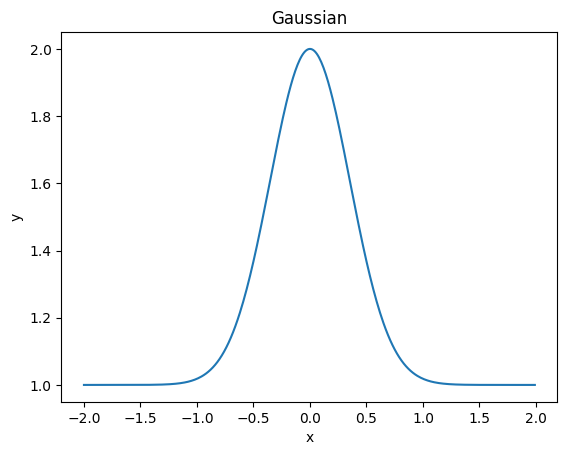

In [160]:
x = np.arange(-2, 2, 0.01)
y = gaussian(x, 1)

plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Gaussian")

Text(0.5, 1.0, 'Relation of population')

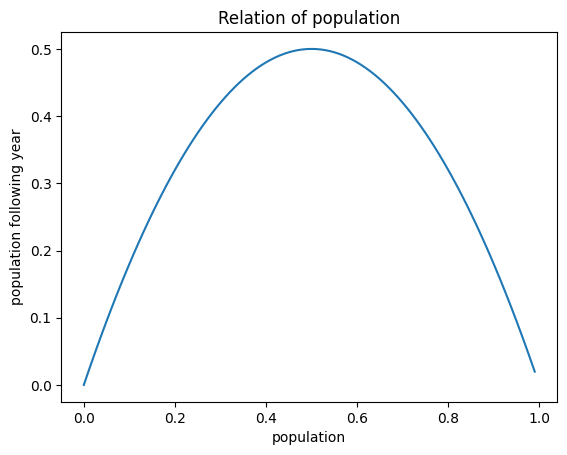

In [129]:
p = np.arange(0, 1, 0.01)
pn = logistic_map(p, 2)

plt.plot(p, pn)
plt.xlabel("population")
plt.ylabel("population following year")
plt.title("Relation of population")

In [130]:
def plot_growth_over_t(f, years, *args):
    x = np.arange(0,1, 0.001)[1:]
    ys = run_func(f, x, years, *args)

    equilibrium = ys[-1,:].mean()

    for y in ys.T:
        plt.plot(y, color="r", alpha=.1)

    plt.hlines(equilibrium, 0, 10, label=f"Equilibrium: {round(equilibrium, 4)}")

    plt.title(f"Equlibrium approach for {years} years")
    plt.xlabel("Year")
    plt.ylabel("x-value")
    plt.legend()


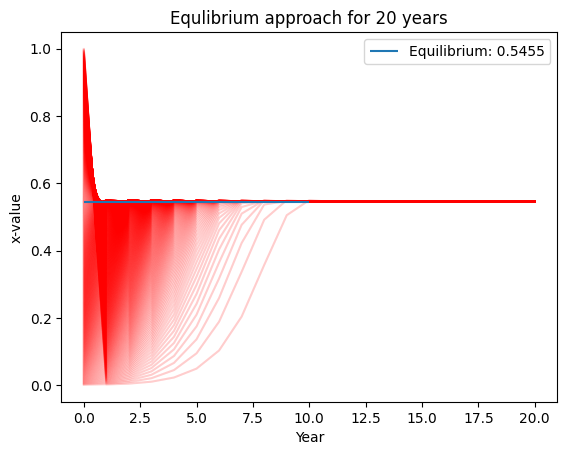

In [131]:
r = 2.2
plot_growth_over_t(logistic_map, 20, r)

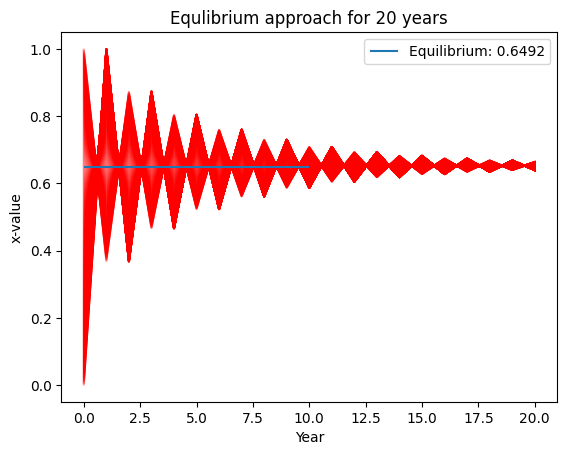

In [153]:
r = 1
plot_growth_over_t(gaussian, 20, r)

In [133]:
def determine_equilibrium(ps: np.ndarray):
    
    # check for two equilibriums
    if np.allclose(ps[2:], ps[:-2], atol=1e-3, rtol=1e-3): # set an equality boundary
        #print("two equilibrium")
        return ps[-2:]
    
    # check for three equilibriums
    if np.allclose(ps[3:], ps[:-3], atol=1e-3, rtol=1e-3): # set an equality boundary
        #print("three equilibrium")
        return ps[-3:]
    
    # check for four equilibriums
    if np.allclose(ps[4:], ps[:-4], atol=1e-3, rtol=1e-3): # set an equality boundary
        #print("four equilibrium")
        return ps[-4:]
    
    # check for four equilibriums
    if np.allclose(ps[5:], ps[:-5], atol=1e-3, rtol=1e-3): # set an equality boundary
        #print("four equilibrium")
        return ps[-5:]
    
    # return equilibrium
    return [ps[-1]]
    
determine_equilibrium(np.array([0.5,1,1.5,0.5,1,1.5,0.5]))

array([1. , 1.5, 0.5])

In [155]:
def plot_bifurcation(f, f_name, rs, years=50, x_init=.5):
    err_setting = np.seterr(over='ignore', invalid='ignore')

    r_end = rs[-1]

    fig = plt.figure(figsize=(15,10))
    plt.title(f"{f_name} Bifurcation Diagram (initial p={x_init})")
    plt.xlabel("r - Value")
    plt.ylabel("Equilibrium")

    for r in rs:
        xs = run_func(f, np.array([x_init]), years, r)

        equ = determine_equilibrium(xs[-10:])

        plt.scatter(np.repeat(r, len(equ)), equ, color=colormaps["plasma"](r/r_end), marker=".")


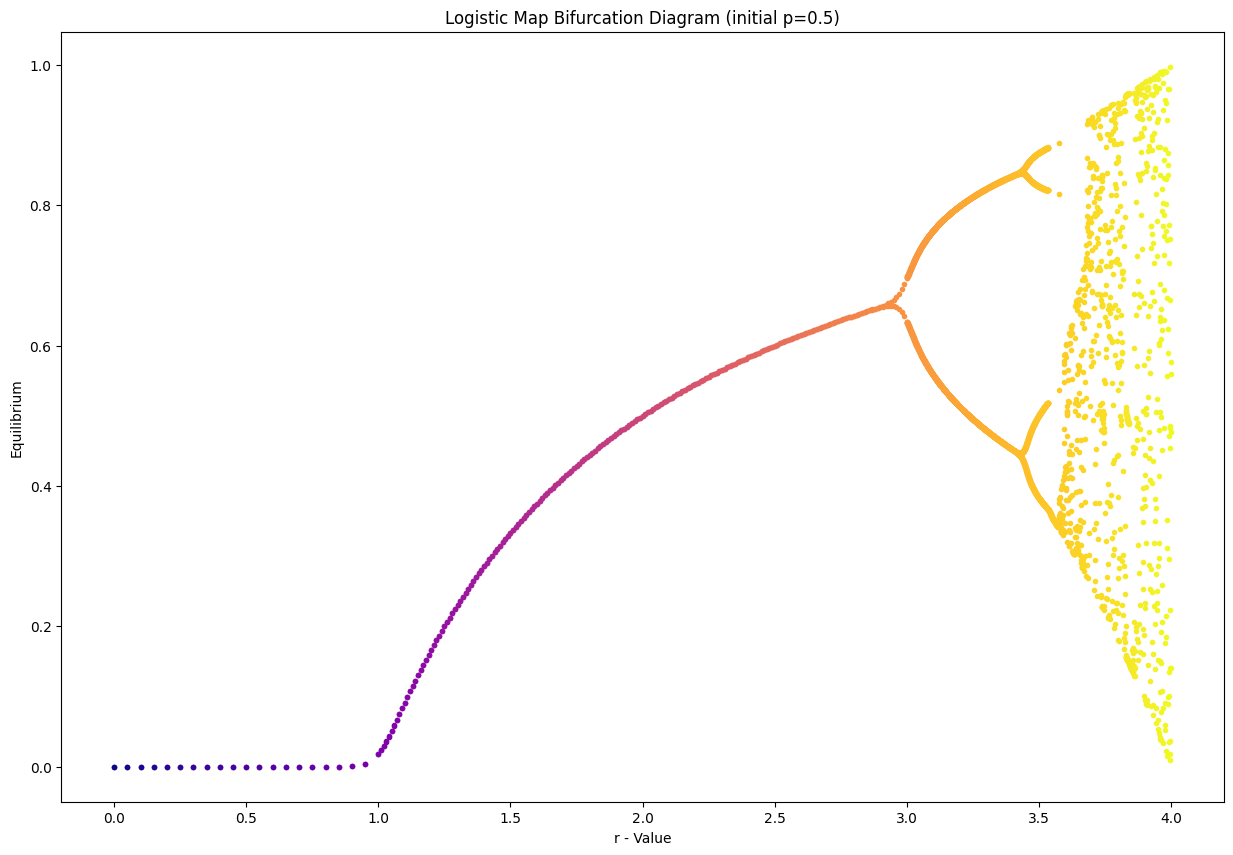

In [137]:
# alter the point density for the interesting regions
rs = np.concatenate([np.arange(0, 1, 0.05), np.arange(1, 3, 0.01), np.arange(3, 4, 0.0005)])

plot_bifurcation(logistic_map, "Logistic Map", rs)

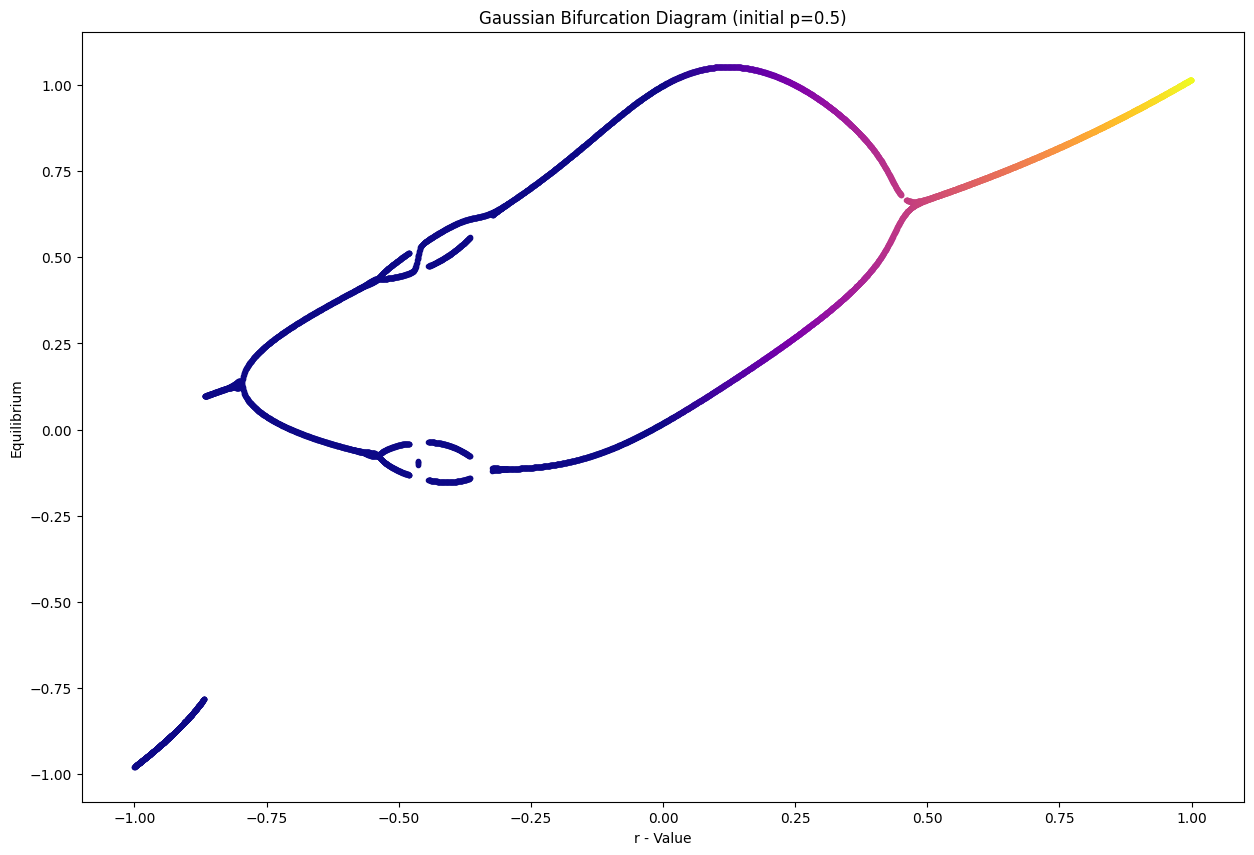

In [162]:
rs = np.concatenate([np.arange(-1, 1, 0.0005)])

plot_bifurcation(gaussian, "Gaussian", rs)

## Feigenbaum Constant